In [1]:
from tensorflow import keras
import matplotlib.pyplot as plt
from keras.callbacks import EarlyStopping
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
import numpy as np
import pandas as pd

In [2]:
(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data(path="mnist.npz")

In [3]:
label = ['0','1','2','3','4','5','6','7','8','9']

In [4]:
model = keras.Sequential()
model.add(keras.layers.Flatten(input_shape=(28, 28)))
model.add(keras.layers.Dense(500,activation='relu'))
model.add(keras.layers.Dense(10,activation='softmax'))

In [5]:
model.compile(loss="sparse_categorical_crossentropy",optimizer='Adam',metrics=['accuracy'])

In [6]:
early_stop = EarlyStopping(monitor='val_loss',mode='min',verbose=0,patience=5)
history = model.fit(x_train,y_train,epochs=400,validation_data=(x_test,y_test),callbacks=[early_stop])

Epoch 1/400
1875/1875 [==============================] - 4s 2ms/step - loss: 7.2467 - accuracy: 0.8687 - val_loss: 0.4153 - val_accuracy: 0.9199
Epoch 2/400
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3056 - accuracy: 0.9405 - val_loss: 0.2671 - val_accuracy: 0.9434
Epoch 3/400
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2734 - accuracy: 0.9428 - val_loss: 0.3005 - val_accuracy: 0.9367
Epoch 4/400
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2424 - accuracy: 0.9480 - val_loss: 0.2807 - val_accuracy: 0.9470
Epoch 5/400
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2308 - accuracy: 0.9522 - val_loss: 0.3111 - val_accuracy: 0.9431
Epoch 6/400
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2119 - accuracy: 0.9539 - val_loss: 0.3015 - val_accuracy: 0.9453
Epoch 7/400
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2200 - accuracy: 0.9545 - val_loss: 0.3229 - val_ac

In [7]:
y_pred = model.predict(x_test)
y_pred = np.argmax(y_pred,axis=1)
y_pred

array([7, 2, 1, ..., 4, 5, 6])

In [8]:
confusion_matrix(y_pred,y_test)

array([[ 948,    0,    0,    0,    2,    3,    2,    1,    2,    4],
       [   0, 1110,    0,    0,    2,    1,    2,    1,    1,    3],
       [   2,    4,  972,    3,    5,    2,    0,    7,    6,    0],
       [   1,    2,   22,  976,    0,   29,    1,    5,   10,   16],
       [   0,    0,    4,    1,  897,    1,    2,    1,    5,    8],
       [  13,    2,    1,   10,    3,  827,   18,    0,    6,    5],
       [   4,    0,    1,    0,    6,   10,  916,    0,    2,    0],
       [   1,    2,   15,    9,    6,    1,    1,  991,    2,    9],
       [   9,   15,   15,    9,   18,   14,   16,    5,  925,   11],
       [   2,    0,    2,    2,   43,    4,    0,   17,   15,  953]])

In [9]:
accuracy_score(y_pred,y_test)

0.9515

In [10]:
print(classification_report(y_pred,y_test))

              precision    recall  f1-score   support

           0       0.97      0.99      0.98       962
           1       0.98      0.99      0.98      1120
           2       0.94      0.97      0.96      1001
           3       0.97      0.92      0.94      1062
           4       0.91      0.98      0.94       919
           5       0.93      0.93      0.93       885
           6       0.96      0.98      0.97       939
           7       0.96      0.96      0.96      1037
           8       0.95      0.89      0.92      1037
           9       0.94      0.92      0.93      1038

    accuracy                           0.95     10000
   macro avg       0.95      0.95      0.95     10000
weighted avg       0.95      0.95      0.95     10000



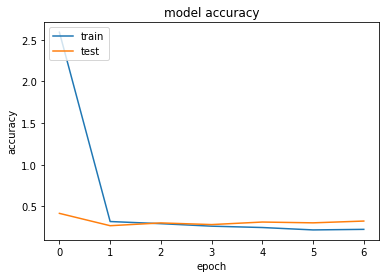

In [11]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [14]:
model.save("digit.hdf5")